## <div align="center">K-Means</div>

In [1]:
import os
import numpy as np
import pandas as pd
from tables import *
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics

### INTRODUCTION: in this Jupyter Notebook I will do clustering analysis with K-Means.

### Part 1.  Elbow Method
### Part 2.  Multidimensional K-Means
### Part 3.  Conclusion

## <div align="center">Part 1. Elbow Method</div>

Elbow method can help me determine the optimal number of clusters, which can help me avoid underfitting or overfitting my data.

In [2]:
# Load my data
features_array = np.load('features_array_ptne_1.0.npy')
label_array = np.load('label_array_ptne_1.0.npy')

In [3]:
categories = ['breathing', 'coughing', 'footsteps', 'laughing', 'sneezing', 'snoring', 'toilet_flush', 'vacuum_cleaner', 'washing_machine']

/Users/av/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/av/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/av/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/av/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/av/opt/anacon

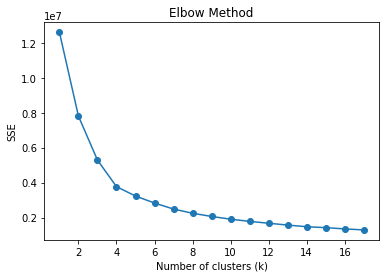

In [4]:
# Calculate (SSE) for different values of k

sse = []
for k in range(1, 18):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features_array)
    sse.append(kmeans.inertia_)

# Plot the SSE values against the number of clusters (k)
plt.plot(range(1, 18), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


Looking at the graph I would chose 4 clusters because for me it's an "elbow", but I know the number of clusters, which is 9, and I will go with 9.

## <div align="center">Part 2. Multidimensional K-Means</div>

#### SECTION A. Data preparation

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import silhouette_score


X = features_array
y = label_array

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In order to see the performace of K-Means, I need to prepare(label) test and train data. Thus when appply a test set to our K-Means  I could compare if the predicted cluster matches with the real cluster.( because the data is labeled)

In [6]:
# Train Data  
y_train = np.vstack(y_train)
train_sum_up = np.hstack([y_train, X_train])
train_pd = pd.DataFrame(train_sum_up)

# Test Data  
y_test = np.vstack(y_test)
test_sum_up = np.hstack([y_test, X_test])
test_pd = pd.DataFrame(test_sum_up)
train_pd.head()

,0,1,2,3,4
0,2.0,-0.861425,0.163850,2.256630,-1.231536
1,0.0,1.112573,-1.074755,-1.072615,0.813643
2,5.0,1.855265,-0.466318,-0.483769,-0.989633
3,8.0,-0.939603,-1.139945,-0.211994,2.572936
4,3.0,-0.431446,-0.466318,0.829811,0.307846


In [7]:
# Train model
kmeans = KMeans(n_clusters=9)
kmeans.fit(X_train)


/Users/av/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9)

Lets see  Mean distance from centroid, it might give me alsready some insight.

In [8]:
from sklearn.metrics import pairwise_distances

# Get the cluster labels and centroid coordinates
labels_pred = kmeans.labels_
centroids = kmeans.cluster_centers_

# Compute the distances between each data point and its assigned centroid
distances = pairwise_distances(X_train, centroids)

# Print the mean distance of each cluster from its centroid
for i in range(9):
    mean_distance = np.mean(distances[labels_pred == i, i])
    print("Cluster {}: Mean distance from centroid = {}".format(i, mean_distance))

Cluster 0: Mean distance from centroid = 0.8142364230193229
Cluster 1: Mean distance from centroid = 0.651358546352501
Cluster 2: Mean distance from centroid = 0.7467473827741948
Cluster 3: Mean distance from centroid = 1.0570364750239793
Cluster 4: Mean distance from centroid = 0.7338273490796581
Cluster 5: Mean distance from centroid = 0.7487675273556634
Cluster 6: Mean distance from centroid = 0.7124910783748304
Cluster 7: Mean distance from centroid = 0.6847903630233217
Cluster 8: Mean distance from centroid = 0.7963817433383661


Clusters with smaller mean distances from their centroids (mean distance of 0.65) indicate that the data points in the cluster are tightly packed around their centroid, and the centroid is a good representative of the cluster.  1, 2, 4, 5, 7, 8  are close to each other, maybe these clusters can be separated from each other.

In [9]:
dict_mapping = {0: 'breathing', 1: 'coughing', 2: 'footsteps', 3: 'laughing', 4: 'sneezing', 5: 'snoring', 6: 'toilet_flush', 7: 'vacuum_cleaner', 8: 'washing_machine'}

# Store labels
train_pd['Group'] = kmeans.labels_

# rename the '0' column to 'labels'
train_pd = train_pd.rename(columns={ 0: 'labels'})


# # # Replace the values in 'labels' column with the dictionary 
train_pd['labels'].replace(dict_mapping, inplace=True)


train_pd.head()

,labels,1,2,3,4,Group
0,footsteps,-0.861425,0.163850,2.256630,-1.231536,5
1,breathing,1.112573,-1.074755,-1.072615,0.813643,3
2,snoring,1.855265,-0.466318,-0.483769,-0.989633,7
3,washing_machine,-0.939603,-1.139945,-0.211994,2.572936,8
4,laughing,-0.431446,-0.466318,0.829811,0.307846,4


I check what labels of each group it has and then define a maximum number in each group and that will represent a class of a group.

In [10]:
result_dict = {}
for groupNum in range(0, 9):
    df_temp = train_pd.loc[(train_pd['Group'] == groupNum)]
    groupsize = df_temp.groupby('labels').size()  
    max_label = groupsize.idxmax()  # Get the label with the maximum value for each group
    max_value = groupsize.max()
    result_dict[groupNum] = max_label
print(result_dict)


{0: 'snoring', 1: 'breathing', 2: 'footsteps', 3: 'vacuum_cleaner', 4: 'toilet_flush', 5: 'washing_machine', 6: 'sneezing', 7: 'sneezing', 8: 'vacuum_cleaner'}


In [11]:
# Define the mapping dictionary - I need it to return my labels back to numbers.

dict_mapping_2 = {0.0: 'breathing', 1.0: 'coughing', 2.0: 'footsteps', 3.0: 'laughing', 4.0: 'sneezing', 5.0: 'snoring', 6.0: 'toilet_flush', 7.0: 'vacuum_cleaner', 8.0: 'washing_machine'}
# dict_mapping_2 = {'breathing' : 1.0, 'coughing': 2.0, 'footsteps' : 3.0, 'laughing' : 4.0, 'sneezing' : 5.0, 'snoring' : 6.0, 'toilet_flush' : 7.0, 'vacuum_cleaner': 8.0, 'washing_machine' : 9.0}



In [12]:
# I feed the model with a train data, then conver to pandas for further manipulation
y_pred = kmeans.predict(X_test)
y_pred = np.vstack(y_pred)
test_pd['Group'] = y_pred
# print(test_pd.head(5))

# The results of the prediction of a model in numbers replaced with new classes from result_dict
test_pd.replace({"Group": result_dict}, inplace=True)
# print(test_pd.head(5))

# # rename the '0' column to 'labels'
test_pd = test_pd.rename(columns={0 : 'labels'})

# Replace the values in 'labels' column with the dictionary mapping
test_pd['labels'].replace(dict_mapping_2, inplace=True)


test_pd.head()

,labels,1,2,3,4,Group
0,snoring,-0.783247,0.076930,1.305417,-0.307907,breathing
1,breathing,-0.607346,-0.509778,0.807163,0.571740,toilet_flush
2,sneezing,-0.998237,0.989586,0.467444,-0.263925,breathing
3,laughing,1.874809,-0.705347,-0.664953,-0.593792,sneezing
4,laughing,0.721682,-0.140369,0.308908,-0.813704,snoring


#### SECTION B. Results

Accuracy: 0.27
Silhouette score: 0.30


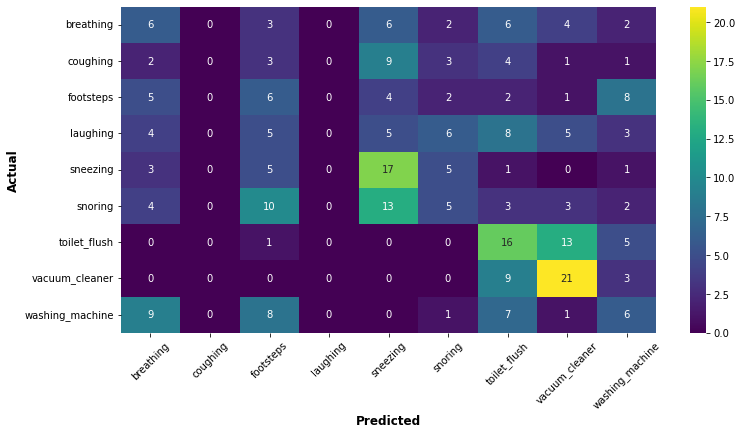

In [13]:
# Now I do a comparison between columns: "labels" and "Groups", that are respectively y_test and y_pred.
y_test = test_pd['labels']
y_pred = test_pd['Group']
labels = np.sort(test_pd['labels'].astype(str).unique())


plt.figure(figsize=(12,6))
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='viridis')
ax.set_yticklabels(labels, rotation = 0)
ax.set_xticklabels(labels, rotation = 45)
ax.set_xlabel('Predicted', fontsize=12, fontweight='bold')
ax.set_ylabel('Actual', fontsize=12, fontweight='bold')

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

silhouette_score = silhouette_score(X_train, labels_pred)
print('Silhouette score: {:.2f}'.format(silhouette_score))


<Figure size 864x432 with 0 Axes>

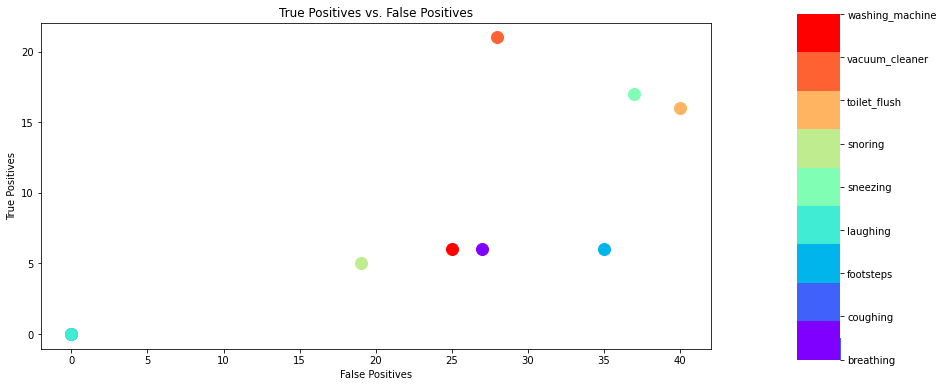

In [19]:
# Define a list of colors for each category
colors = plt.cm.get_cmap('rainbow', len(categories))

# Calculate the confusion matrix
plt.figure(figsize=(12,6))

# Extract the True Positive and False Positive counts
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP

# Main plot and the color box axis
fig, ax = plt.subplots(figsize=(12, 6))
ax_cb = fig.add_axes([1, 0.1, 0.05, 0.8])

# Plot the True Positives against False Positives + diff colors
for i, category in enumerate(categories):
    ax.plot(FP[i], TP[i], 'o', color=colors(i), label=category, markersize=12)

# Set the axis labels and title
ax.set_xlabel('False Positives')
ax.set_ylabel('True Positives')
ax.set_title('True Positives vs. False Positives')

# Remove the ticks and labels from the color box axis
ax_cb.set_xticks([])
ax_cb.set_yticks([])
ax_cb.set_frame_on(False)

# Create the color box and add it to the color box axis
color_box = ax_cb.imshow(np.arange(len(categories)).reshape(1, -1), cmap=plt.cm.get_cmap('rainbow', len(categories)), aspect='auto')
color_bar = fig.colorbar(color_box, cax=ax_cb, ticks=np.arange(len(categories)))
color_bar.ax.set_yticklabels(categories)

plt.show()


In [15]:
# Calculate the adjusted Rand index
ari = metrics.adjusted_rand_score(y_test, y_pred)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.08950758686353139


## <div align="center">Part 3. Conclusion</div>

1. Accuracy is 27% which is very low. Should be found another way of preprocessing data or this data is not sutable for clastering. At this point clustering fails.
2. The Silhouette score ranges from -1 to 1, where a score closer to 1 indicates well-defined clusters, a score close to 0 indicates overlapping clusters, and a score close to -1 indicates misclassified points. Score of 0.30 according to the theory indicates that the clustering algorithm has produced somewhat meaningful clusters, but comparing to the accuracy and confusion matrix we can see the the clustering does not work properly.
3.  In Confusion Matrix each class seems to be distributed across multiple clusters, which means that the clusters are not well-defined or separated.  The classes "coughing" and "laughing" have  low numbers of correctly classified values. The classes "toilet_flush", "washing_machine" and "vacuum_cleaner" have has a high number of correctly classified instances, but also have a high number of false positive instances which means that the model is sensitive to these classes but not tuned.
4. ARI is 0.089, which is a low score. There is very little similarity between the clusters assigned and the true labels of the data. 

The model is not able to accurately clustering the samples.
**Reasons:**
1. Centroids initialized in wrong places.
2. Presence of outliers.
3. Number of clusters.
4. Data set.

I would  say that the problem lays somewhere in the dataset.
However, highly likely some change with data preprocessing could possibly improve the model.

## <div align="center">K-Means vs SVM</div>

It looks like the performance of SVM is better because it has higher accuracy (32% vs 27%), true positive is also higher (104 vs 77). Moreover, K-Means could not identify: "coughing" and "laughing".